In [20]:
import tensorflow as tf
import zipfile,os,subprocess,splitfolders

**Proses Download Datasets**

In [21]:
zip_path = "./resources/sample_data/rockpaperscissors.zip"

if not os.path.exists(zip_path):
    print(f"File '{zip_path}' does not exist. Downloading...")
    
    subprocess.run([
        'wget', '--no-check-certificate',
        'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip',
        '-O', zip_path
    ])
else:
    print(f"File '{zip_path}' already exists. Skipping download.")

File './resources/sample_data/rockpaperscissors.zip' already exists. Skipping download.


**Extract Datasets**

In [22]:
public_url_zib = "./resources/sample_data/rockpaperscissors"
if not os.path.exists(public_url_zib) and not os.path.isfile(public_url_zib):
    zip_ref = zipfile.ZipFile(f"{public_url_zib}.zip", 'r')
    zip_ref.extractall(public_url_zib)
    zip_ref.close()

**Train Split**

In [23]:
base_dir = f"{public_url_zib}/rockpaperscissors/rps-cv-images"
if not (os.path.isdir(f"{base_dir}train") or os.path.isdir(f"{base_dir}val")):
    splitfolders.ratio(base_dir, output=base_dir, seed=407, ratio=(0.6, 0.4), group_prefix=None)

    training_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'val')

**Cek apakah directory benar ter-split**

In [24]:
print(os.listdir(base_dir))

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors', 'train', 'val']


In [25]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    batch_size=3,
    class_mode="categorical",
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=2,
    class_mode='categorical',
)

Found 1312 images belonging to 3 classes.


Found 876 images belonging to 3 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [29]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

**Latih Model**

In [30]:
model.fit(
    train_generator,
    steps_per_epoch=52,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=32,
    verbose=4
)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

1/1 [==============================] - 0s 56ms/step
0
PAPER


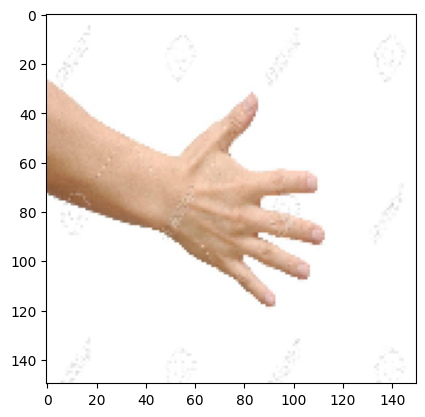

In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
%matplotlib inline

paper = "./resources/sample_data/rockpaperscissors/rockpaperscissors/paper/2IOsxsG8AaxntdJM.png"
rock = "./resources/sample_data/rockpaperscissors/rockpaperscissors/rps-cv-images/rock/dZ6rscIYTbmlwVZE.png"
scissors = "./resources/sample_data/rockpaperscissors/rockpaperscissors/scissors/1xkTkvyzmavV7lQ5.png"

sample = "./resources/sample_data/image/paper-hand.jpg"
img = image.load_img(sample, target_size=(150,150))

implot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images)
result =  np.argmax(classes)

print(result)
if result==0:
    print("PAPER")
elif result==1:
    print("ROCK")
elif result==2:
    print("SCISSORS")
else:
    print("ANOMALY")